# LMS Auto-EQ Algorithm


Steps:
1. 建立一FIR演算法，將白噪音訊號x(n)與FIR做卷積運算，得到Desire訊號 D(n)
2. 建立一LMS演算法，輸入白噪音訊號x(n)，利用LMS找出一組FIR目標濾波器，卷積後輸出Y(n)
3. 損失函數:將Y(n)與D(n)的誤差達到最小，表示找到了最擬合的模型係數

In [1]:
import numpy as np

def fir_convolution(x, h):
  """
  Performs convolution of a signal x with a FIR filter h.

  Args:
      x: Input signal.
      h: FIR filter coefficients.

  Returns:
      y: Output signal.
  """
  N = len(h)

  print(N)
  y=[]

  for n in range(len(x) - 1):
    tmp=0
    for k in range(N):
      if n - k >= 0:
        tmp += x[n - k] * h[k]
    y.append(tmp)

  return np.array(y)



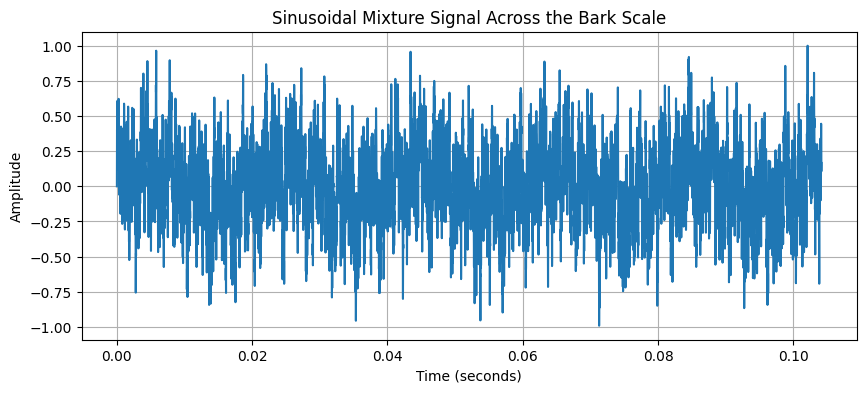

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def hz_to_bark(f):
    """Convert frequency from Hz to Bark."""
    return 26.81 * (f / (1960 + f)) - 0.53

def bark_to_hz(b):
    """Convert Bark to frequency in Hz."""
    return 1960 * (b + 0.53) / (26.81 - (b + 0.53))

def generate_bark_scale_signal(length, sample_rate, lowcut, highcut, Nband):
    """
    Generate a sinusoidal mixture signal using frequencies spaced across the Bark scale.

    Args:
        length: The length of the signal in samples.
        sample_rate: The sample rate in Hz.

    Returns:
        t: Time vector for the signal.
        x: Generated sinusoidal mixture signal.
    """
    # Generate frequencies using the Bark scale
    bark_values = np.linspace(hz_to_bark(lowcut), hz_to_bark(highcut), Nband)  # N bands
    frequencies = bark_to_hz(bark_values)

    # Time vector
    t = np.arange(length) / sample_rate

    # Create sinusoidal mixture signal
    x = np.sum([np.sin(2 * np.pi * freq * t) for freq in frequencies], axis=0)

    # Normalize the signal amplitude
    x /= np.max(np.abs(x))

    return t, x

def plot_signal(t, x, title='Sinusoidal Mixture Signal Across the Bark Scale'):
    """
    Plot the generated sinusoidal mixture signal.

    Args:
        t: Time vector for the signal.
        x: Sinusoidal mixture signal.
        title: Title for the plot.
    """
    plt.figure(figsize=(10, 4))
    plt.plot(t, x)
    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Example of generating and plotting the signal
t, x = generate_bark_scale_signal(10000, 96000,50,20000,10)
plot_signal(t, x)


In [3]:
from scipy.signal import chirp

# Parameters
duration = 0.5       # duration of the sweep in seconds
start_freq = 20     # starting frequency in Hz
end_freq = 20000    # ending frequency in Hz
sample_rate = 44100 # sample rate in Hz
amplitude = 0.5     # amplitude of the signal

# Time array
t = np.linspace(0, duration, int(sample_rate * duration))

# Generate sweep sine signal
sweepX = amplitude * chirp(t, f0=start_freq, f1=end_freq, t1=duration, method='linear')
print(len(sweepX))

22050


In [4]:
bark_values = np.linspace(hz_to_bark(50), hz_to_bark(250), 3)  # 24 bands
bark_to_hz(bark_values)

array([ 50.        , 145.26066351, 250.        ])

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

#download Wav file
!gdown --id 1_6n4KjXmFNUzXhLy-ru8ElKEFeqL_tPu

# Read the WAV file
fs, data = wavfile.read("/content/test_IR-96k.wav")

# Plot the impulse response
# Find the index of the maximum value in the array
max_index = np.argmax(data)
ir=data[max_index:max_index+256]
ir = (ir - np.min(ir)) / (np.max(ir) - np.min(ir)) * 2 - 1
ir *=0.2
plt.plot(ir)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Impulse Response")
plt.show()


# Plot the spectrum of the output signal
# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(np.fft.fft(ir))

# Convert the magnitude spectrum to dB
db_spectrum = 20 * np.log10(magnitude_spectrum / np.max(magnitude_spectrum))
db_spectrum=db_spectrum[:int(len(db_spectrum)/2)]
# Plot the magnitude spectrum in dB using a logarithmic scale
plt.semilogx(db_spectrum)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Magnitude Spectrum of Impulse Response (dB)")
plt.show()

/root/anaconda3/envs/RL_work/lib/python3.9/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_6n4KjXmFNUzXhLy-ru8ElKEFeqL_tPu
To: /data/my_research_proj/Adaptive_filter/test_IR-96k.wav
100%|██████████████████████████████████████| 1.05M/1.05M [00:00<00:00, 10.1MB/s]


FileNotFoundError: [Errno 2] No such file or directory: '/content/test_IR-96k.wav'

In [ ]:
import matplotlib.pyplot as plt
# Example usage
# Generate a white noise signal

x = np.random.randn(10000)*0.1
y = fir_convolution(x, ir)
# y = np.convolve(x,ir,'same')
# Plot the x and y signals
plt.plot(x, label="x")
plt.plot(y, label="y")

# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Plot of x and y Signals")

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(np.fft.fft(x))

# Convert the magnitude spectrum to dB
db_spectrum = 20 * np.log10(magnitude_spectrum )
db_spectrum_X=db_spectrum[:int(len(db_spectrum)/2)]

magnitude_spectrum = np.abs(np.fft.fft(y))

# Convert the magnitude spectrum to dB
db_spectrum = 20 * np.log10(magnitude_spectrum )
db_spectrum_Y=db_spectrum[:int(len(db_spectrum)/2)]
# Plot the magnitude spectrum in dB using a logarithmic scale
plt.semilogx(db_spectrum_X,label="x FFT")
plt.semilogx(db_spectrum_Y,label="y FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.title("Magnitude Spectrum of Impulse Response (dB)")
# Add legend
plt.legend()
plt.show()

In [ ]:
def shift_buffer(buf, x):
  """
  Shifts the elements of a buffer and inserts a new value.

  Args:
      buf: The buffer to shift.
      x: The new value to insert.

  Returns:
      None
  """

    # buf[k] =buf[k-1]
    # ...
    # buf[2] = buf[1]
    # buf[1] = buf[0]
    # buf[0] = x
  for i in range(len(buf) - 1, 0, -1):
    buf[i] = buf[i - 1]
  buf[0] = x



In [ ]:
import numpy as np

def fir_convolution(x, h ,buf):
  """
  Performs convolution of a signal x with a FIR filter h.

  Args:
      x: Input signal.
      h: FIR filter coefficients.

  Returns:
      y: Output signal.
  """
  shift_buffer(buf, x)
  y = np.dot(buf,h)
  return y ,buf


In [ ]:

buf = np.zeros(len(ir))
# x = np.random.randn(100)*0.1
x = np.random.randn(1000)*0.1
y=[]
for n in range(len(x)):
  out, buf = fir_convolution(x[n],ir ,buf)
  y.append(out)

y_ = np.convolve(x,ir)

# Plot the x and y signals
plt.plot(y, label="y")
plt.plot(y_,'--', label="y_")

# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Plot of x and y Signals")

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
def pnlms_filter(x, d, N, mu, gamma=0.1):
    """
    Proportionate Normalized Least Mean Squares (PNLMS) filter.

    Args:
        x: Input signal array.
        d: Desired signal array.
        N: Filter order (number of coefficients).
        mu: Step size (learning rate).
        gamma: Small constant to prevent division by zero and control proportionate update.

    Returns:
        y: Output signal.
        err: Error signal.
        w: Adaptive filter coefficients.
    """

    # Initialize the adaptive filter coefficients
    w = np.zeros(N)
    # Initialize a weights vector for the proportionate update
    g = np.ones(N) * gamma
    y, err = [], []

    for n in range(len(x) - N + 1):
        # Create the input vector from the input signal
        u = x[n:n+N][::-1]  # Take N samples, reverse for convolution operation

        # Filter output
        out = np.dot(u, w)
        # Instantaneous error
        e = d[n+N-1] - out  # Align with the latest data point

        # Normalization factor
        norm_factor = np.dot(u * g, u) + 1e-8

        # Update the filter coefficients
        w += (mu / norm_factor) * e * u * g

        # Optional: Update the proportionate weights (not required for basic PNLMS)
        # g = update_proportionate_weights(g, w, gamma)

        y.append(out)
        err.append(e)

    return y, err, w

In [ ]:
def custom_mse(y_true, y_pred):
    # Ensure both inputs are NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the squared error
    squared_error = np.square(y_true - y_pred)

    # Calculate the mean squared error
    mse = np.mean(squared_error)

    return mse

In [ ]:
import numpy as np

def lms_filter(x, d, N, mu):
  """
  Performs Least Mean Squares (LMS) filtering on a signal.

  Args:
      x: Input signal.
      d: Desired signal.
      N: Filter order.
      mu: Learning rate.

  Returns:
      y: Output signal.
      w: Final filter coefficients.
  """

  # Initialize filter coefficients and output signal
  w, buf = np.zeros(N), np.zeros(N)


  # Iterate through each sample
  # for _ in range(1):
  y,err = [],[]
  for n in range(len(x)):

    # Calculate the output
    out, buf = fir_convolution(x[n], w ,buf)

    # Calculate the error
    e = d[n] - out
    # norm_factor = np.dot(buf, buf) + 1e-8
    # Update the filter coefficients
    # w = w + (mu * e * buf )/ norm_factor


    norm_factor = np.dot(buf , buf) + 1e-8

    # Update the filter coefficients
    w += (mu / norm_factor) * e * buf
    mu *= 0.9995
    err.append(e)
    y.append(out)
  print("mu:",mu)
  return y, err, w

# Example usage:
# t, x = generate_bark_scale_signal(10000, 96000)
np.random.seed(0)
noise = 0.03 * np.random.randn(10000)
x = np.random.randn(10000)*0.1
d = np.convolve(x+ noise,ir)

N = 256
mu = 0.7
y, err, w = lms_filter(x, d, N, mu)

mse=custom_mse(d[len(y)], y)
print("mse:",mse)
# y, err, w = pnlms_filter(x, d, N, mu, gamma=0.1)
# print(y)
# print(w)
# Plot the x and y signals

plt.plot(d, label="Desired signal")
plt.plot(y,'--', label="Output signal")
plt.plot(err,'--',  label="error")

# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Add legend
plt.legend()

# Show the plot
plt.show()


plt.plot(ir, label="Desired FIR Weights")
plt.plot(w, label="Observation FIR Weights")

plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML, display
def Nlms_filter(x, d, N, mu):
    w, buf = np.zeros(N), np.zeros(N)
    y, err = [], []
    W = np.zeros((len(x), N))  # For storing w at each iteration

    for n in range(len(x)):
        out, buf = fir_convolution(x[n], w, buf)
        e = d[n] - out
        norm_factor = np.dot(buf, buf) + 1e-8
        w += (mu * e * buf) / norm_factor
        W[n, :] = w  # Save the filter coefficients after update
        err.append(e)
        y.append(out)

    return y, err, W

# Example usage:
x = np.random.randn(10000) * 0.1
d = np.convolve(x, ir)  # Example impulse response
N = 256
mu = 0.7
frames = len(x)

y, err, W = Nlms_filter(x, d, N, mu)


# Plotting
fig, ax = plt.subplots()
line, = ax.plot(W[0, :], 'r-')
ax.set_xlim(0, N-1)
ax.set_ylim(np.min(W)-0.1, np.max(W)+0.1)

def update(frame):
    line.set_ydata(W[frame*10, :])
    ax.set_title(f'Iteration {frame*10}')
    return line,

ani = FuncAnimation(fig, update, frames=200, blit=True)
rc('animation',html='jshtml')
ani

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def iir_convolution(x, a , b, bufa,bufb):
  """
  Performs convolution of a signal x with a FIR filter h.

  Args:
      x: Input signal.
      h: FIR filter coefficients.

  Returns:
      y: Output signal.
  """

  shift_buffer(bufb, x)
  y = np.dot(b, bufb) - np.dot(a[1:], bufa)

  # Update buffers
  shift_buffer(bufa, y)

  return y ,bufb, bufa
def update_proportionate_weights(g, w, gamma, alpha=0.5):
    """
    Update proportionate weights for PNLMS filter.

    Args:
        g: Current proportionate weights.
        w: Current filter coefficients.
        gamma: Small constant to prevent division by zero.
        alpha: Smoothing factor to control the adaptation of the weights.

    Returns:
        Updated proportionate weights.
    """
    # Compute the maximum absolute coefficient value
    max_w = np.max(np.abs(w))
    # Avoid division by zero and stabilize the update
    max_w = max(max_w, 1e-8)
    # Update the weights based on the relative magnitude of each coefficient
    g = alpha * (np.abs(w) / max_w) + (1 - alpha) * g
    # Ensure all weights are above a small threshold
    g = np.maximum(g, gamma)
    return g

def IIR_lms_filter(x, d, N, mu):
  """
  Performs Least Mean Squares (LMS) filtering on a signal.

  Args:
      x: Input signal.
      d: Desired signal.
      N: Filter order.
      mu: Learning rate.

  Returns:
      y: Output signal.
      w: Final filter coefficients.
  """

  # Initialize filter coefficients and output signal
  wb, wa, bufb, bufa = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N-1)
  # wb2, wa2, bufb2, bufa2 = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
  wa[0]=1

  # Iterate through each sample
  # for _ in range(1):
  y,err = [],[]
  # Initialize a weights vector for the proportionate update

  alpha=0.005
  gamma=0.1
  g = np.ones(N) *gamma
  g2 = np.ones(N) *gamma
  for n in range(len(x)):

    # out = np.dot(wb, bufb) - np.dot(wa[1:], bufa[1:])
    # out2 = np.dot(wb2, bufb2) - np.dot(wa2[1:], bufa2[1:])
    out, bufb, bufa = iir_convolution(x[n], wa , wb, bufa, bufb)
    # Compute error
    e = d[n] - out

    # Update coefficients
    norm_factor = np.dot(bufb, bufb)# + 1e-8
    wb = wb + mu  * e * bufb # / norm_factor

    norm_factor = np.dot(bufa, bufa) + 1e-8
    wa[1:] = wa[1:]- mu  * e * bufa #/ norm_factor

    mu *= 0.9995

    err.append(e)
    y.append(out)
  print("mu:",mu)
  return y, err, wa, wb


# Example usage:
leng=10000
# t, x = generate_bark_scale_signal(leng, 96000, 50,250)
# x *= 0.61

x = np.random.randn(leng)*0.1
np.random.seed(0)
noise = 0.03 * np.random.randn(leng)
d = np.convolve(x+noise,ir)

N = 24
mu = 0.43
y, err, a, b = IIR_lms_filter(x, d, N, mu)
print('ok')
# Plot the x and y signals
plt.plot(d[:leng], label="Desired signal")
plt.plot(y[:leng],'--', label="Output signal")
plt.plot(err[:leng],'--',  label="error")

# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Amplitude")


# Add legend
plt.legend()

# Show the plot
plt.show()




In [ ]:

from scipy.signal import firwin, freqz
from scipy.signal import welch
# Compute the power spectral density using Welch's method
frequencies, power = welch(y, fs=2*np.pi, nperseg=256)  # `fs=2*np.pi` normalizes frequency to [0, 1]

# Normalize frequencies to [0, 1] range where 1 corresponds to the Nyquist frequency
normalized_frequencies = frequencies / np.pi

# Convert power to decibels (dB)
power_db = 10 * np.log10(power)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(normalized_frequencies, power_db,label='Processed Signal')
plt.title('Power Spectral Density in dB')
plt.xlabel('Normalized Frequency (x pi rad/sample)')
plt.ylabel('Power (dB)')
plt.grid(True)

# Frequency response of the optimized IIR filter
freq, response_iir_opt = freqz(b, a)

# Plotting the responses
plt.plot(freq / np.pi, 20 * np.log10(abs(response_iir_opt)), label='IIR Filter', linestyle='--')
plt.title('Comparison of FIR and Optimized IIR Filter Responses')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()

mse=custom_mse(d[:10000], y)
print("mse:",mse)

In [ ]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML, display
def iir_convolution(x, a , b, bufa,bufb):
  """
  Performs convolution of a signal x with a FIR filter h.

  Args:
      x: Input signal.
      h: FIR filter coefficients.

  Returns:
      y: Output signal.
  """
  shift_buffer(bufb, x)
  y = np.dot(bufb,b) - np.dot(bufa,a)

  shift_buffer(bufa, y)
  return y ,bufb, bufa

def IIR_nlms_filter(x, d, N, mu):
  """
  Performs Least Mean Squares (LMS) filtering on a signal.

  Args:
      x: Input signal.
      d: Desired signal.
      N: Filter order.
      mu: Learning rate.

  Returns:
      y: Output signal.
      w: Final filter coefficients.
  """

  # Initialize filter coefficients and output signal
  wb, wa, bufb, bufa = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
  # wb2, wa2, bufb2, bufa2 = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)


  # Iterate through each sample
  # for _ in range(1):
  y,err = [],[]
  Wa, Wb = np.zeros((len(x), N)),np.zeros((len(x), N))  # For storing w at each iteration
  for n in range(len(x)):

    out = np.dot(wb, bufb) - np.dot(wa[1:], bufa[1:])
    # out2 = np.dot(wb2, bufb2) - np.dot(wa2[1:], bufa2[1:])

    # Compute error
    e = d[n] - out

    # Update coefficients
    # norm_factor_b = np.dot(bufb, bufb) + 1e-8
    # wb = wb*0.8+  (mu * e * bufb)/norm_factor_b

    norm_factor = np.dot(bufb, bufb) + 1e-8
    wb += (2 * mu / (N + 1)) * e * bufb / norm_factor
    Wb[n, :]=wb

    norm_factor = np.dot(bufa[1:], bufa[1:]) + 1e-8
    # wa[1:] = wa[1:]*0.8 - (mu * e * bufa[1:])/norm_factor_a  # a[0] is typically 1 and not adapted
    wa += (2 * mu / (N + 1)) * e * bufa / norm_factor
    Wa[n, :] = wa

    # Update buffers
    bufb = np.roll(bufb, -1)
    bufb[-1] = x[n]
    bufa= np.roll(bufa, -1)
    bufa[-1] = out

    err.append(e)
    y.append(out)

  return y, err, Wa, Wb

def IIR_plms_filter(x, d, N, mu):
  """
  Performs Least Mean Squares (LMS) filtering on a signal.

  Args:
      x: Input signal.
      d: Desired signal.
      N: Filter order.
      mu: Learning rate.

  Returns:
      y: Output signal.
      w: Final filter coefficients.
  """

  # Initialize filter coefficients and output signal
  wb, wa, bufb, bufa = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
  # wb2, wa2, bufb2, bufa2 = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)


  # Iterate through each sample
  # for _ in range(1):
  y,err = [],[]
  # Initialize a weights vector for the proportionate update
  Wa, Wb = np.zeros((len(x), N)),np.zeros((len(x), N))  # For storing w at each iteration
  alpha=0.005
  gamma=0.1
  g = np.ones(N) *gamma
  g2 = np.ones(N) *gamma
  for n in range(len(x)):

    out = np.dot(wb, bufb) - np.dot(wa[1:], bufa[1:])
    # out2 = np.dot(wb2, bufb2) - np.dot(wa2[1:], bufa2[1:])

    # Compute error
    e = d[n] - out

    # Update coefficients
    # norm_factor_b = np.dot(bufb, bufb) + 1e-8
    # wb = wb*0.8+  (mu * e * bufb)/norm_factor_b

    # norm_factor_a = np.dot(bufa[1:], bufa[1:]) + 1e-8
    # wa[1:] = wa[1:]*0.8 - (mu * e * bufa[1:])/norm_factor_a  # a[0] is typically 1 and not adapted

    norm_factor = np.dot(bufb*g, bufb) + 1e-8
    wb = wa*0.8 + (mu *g) * e * bufb / norm_factor
    Wb[n, :]=wb
    norm_factor = np.dot(bufa[1:]*g2[1:], bufa[1:]) + 1e-8
    wa =  wa*0.8 - (mu *g2) * e * bufa / norm_factor

    Wa[n, :]=wa
    # norm_factor = np.dot(bufb2, bufb2) + 1e-8
    # wb2 += (mu * e * bufb2)/norm_factor

    # norm_factor = np.dot(bufa2[1:], bufa2[1:]) + 1e-8
    # wa2[1:] -= (mu * e * bufa2[1:])/norm_factor
    # Update proportionate weights
    g = update_proportionate_weights(g, wb, gamma, alpha)
    g2 = update_proportionate_weights(g2, wa, gamma, alpha)
    # Update buffers
    bufb = np.roll(bufb, -1)
    bufb[-1] = x[n]
    bufa= np.roll(bufa, -1)
    bufa[-1] = out

    # bufb2 = np.roll(bufb2, -1)
    # bufb2[-1] = out
    # bufa2= np.roll(bufa2, -1)
    # bufa2[-1] = out2

    # # Calculate the output
    # out, bufb, bufa = iir_convolution(x[n], wa , wb, bufa, bufb)
    # # Calculate the error
    # e = d[n] - out
    # norm_factor = np.dot(bufa, bufa) + 1e-8
    # # Update the filter coefficients
    # wa += mu * e * bufa / norm_factor

    # norm_factor = np.dot(bufb, bufb) + 1e-8
    # wb -= mu * e * bufb / norm_factor

    err.append(e)
    y.append(out)

  return y, err, Wa, Wb

# Example usage:
leng=2000
x = np.random.randn(leng)*0.1
d = np.convolve(x,ir)

N = 14
mu = 0.53
frames = len(x)

y, err, Wa, Wb = IIR_plms_filter(x, d, N, mu)


# Plotting setup
fig, ax = plt.subplots()
line_a, = ax.plot(Wa[0,:], 'r-', label='Wa')
line_b, = ax.plot(Wb[0,:], 'b-', label='Wb')
ax.set_xlim(0, N-1)
ax.set_ylim(-2, 2)
ax.legend()

def update(frame):
    # 更新数据
    line_a.set_ydata(Wa[frame*10, :])
    line_b.set_ydata(Wb[frame*10, :])
    ax.set_title(f'Iteration {frame*10}')
    return line_a, line_b

ani = FuncAnimation(fig, update, frames=200, blit=True)
rc('animation',html='jshtml')
ani

In [ ]:
def svf(x, d, M=128, L=10, mu1=0.2, mu2=0.2):
  nIters = min(len(x),len(d)) - M
  L2=int(L*(L+1)/2)
  u = np.zeros(M)
  u2 = np.zeros((M,L2))
  w = np.zeros(M)
  h2 = np.zeros(L2)
  e = np.zeros(nIters)
  y=np.zeros(nIters)
  for n in range(nIters):
    u[1:] = u[:-1]
    u[0] = x[n]
    u2_n = np.outer(u[:L],u[:L])
    u2_n = u2_n[np.triu_indices_from(u2_n)]
    u2[1:] = u2[:-1]
    u2[0] = u2_n
    x2 = np.dot(u2,h2)
    g = u + x2
    out = np.dot(w, g.T)
    e_n = d[n] - out
    w = w + mu1*e_n*g/(np.dot(g,g)+1e-8)
    grad_2 = np.dot(u2.T,w)
    h2 = h2 + mu2*e_n*grad_2/(np.dot(grad_2,grad_2)+1e-8)
    mu1 *= 0.9995
    mu2 *= 0.9995
    e[n] = e_n
    y[n]=out
  print("mu1:",mu1)
  print("mu2:",mu2)
  return y,e,w


# Example usage:
leng=10000
t, x = generate_bark_scale_signal(leng, 96000,50,25000,10)
x *= 0.1

x = np.random.randn(leng)*0.1
np.random.seed(0)
noise = 0.03 * np.random.randn(leng)
d = np.convolve(x+noise,ir)

# y, err, b, a = IIR_lms_filter(x, d, N, mu)
y, err,w = svf(x, d, M=256, L=12, mu1=0.7, mu2=0.001)
print('ok')

mse=custom_mse(d[len(y)], y)
print("mse:",mse)

# Plot the x and y signals
plt.plot(d[:leng], label="Desired signal")
plt.plot(y[:leng],'--', label="Output signal")
plt.plot(err[:leng],'--',  label="error")

# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Amplitude")


# Add legend
plt.legend()

# Show the plot
plt.show()

# plt.plot(ir, label="Desired FIR Weights")
plt.plot(w, label="Observation FIR Weights")

plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np

def svf_third_order(x, d, M=128, L=10, mu1=0.2, mu2=0.2, mu3=0.2):
    nIters = min(len(x), len(d)) - M
    L2 = int(L * (L + 1) / 2)
    L3 = int(L * (L + 1) * (L + 2) / 6)  # Calculate number of third-order combinations
    u = np.zeros(M)
    u2 = np.zeros((M, L2))
    u3 = np.zeros((M, L3))
    w = np.zeros(M)
    h2 = np.zeros(L2)
    h3 = np.zeros(L3)
    e = np.zeros(nIters)
    y = np.zeros(nIters)

    for n in range(nIters):
        # Update linear buffer
        u[1:] = u[:-1]
        u[0] = x[n]

        # Update quadratic buffer
        u2_n = np.outer(u[:L], u[:L])
        u2_n = u2_n[np.triu_indices_from(u2_n)]
        u2[1:] = u2[:-1]
        u2[0] = u2_n

        # Update cubic buffer
        u3_n = np.array([u[i] * u[j] * u[k] for i in range(L) for j in range(i, L) for k in range(j, L)])
        u3[1:] = u3[:-1]
        u3[0] = u3_n

        # Compute output from quadratic and cubic terms
        x2 = np.dot(u2, h2)
        x3 = np.dot(u3, h3)

        # Combined input
        g = u + x2 + x3
        out = np.dot(w, g.T)
        e_n = d[n] - out

        # Update weights
        w += mu1 * e_n * g / (np.dot(g, g) + 1e-8)
        grad_2 = np.dot(u2.T, w)
        h2 += mu2 * e_n * grad_2 / (np.dot(grad_2, grad_2) + 1e-8)
        grad_3 = np.dot(u3.T, w)
        h3 += mu3 * e_n * grad_3 / (np.dot(grad_3, grad_3) + 1e-8)

        mu1 *= 0.9995
        mu2 *= 0.9995
        mu3 *= 0.9995
        # Store error and output
        e[n] = e_n
        y[n] = out

    print("mu1:",mu1)
    print("mu2:",mu2)
    print("mu3:",mu3)
    return y, e ,w ,h2,h3


# Example usage:
leng=10000
t, x = generate_bark_scale_signal(leng, 96000,50,25000,10)
x *= 0.1

x = np.random.randn(leng)*0.1
np.random.seed(0)
noise = 0.03 * np.random.randn(leng)
d = np.convolve(x+noise,ir)

# y, err, b, a = IIR_lms_filter(x, d, N, mu)
y, err,w,h2,h3 = svf_third_order(x, d, M=256, L=12, mu1=0.7, mu2=0.001, mu3=0.001)

mse=custom_mse(d[len(y)], y)
print(mse)
print('ok')
# Plot the x and y signals
plt.plot(d[:leng], label="Desired signal")
plt.plot(y[:leng],'--', label="Output signal")
plt.plot(err[:leng],'--',  label="error")

# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Amplitude")


# Add legend
plt.legend()

# Show the plot
plt.show()

# plt.plot(ir, label="Desired FIR Weights")
plt.plot(w, label="Observation FIR Weights")

plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Add legend
plt.legend()

# Show the plot
plt.show()


# plt.plot(ir, label="Desired FIR Weights")
plt.plot(h2, label="second h2 FIR Weights")

plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Add legend
plt.legend()

# Show the plot
plt.show()

# plt.plot(ir, label="Desired FIR Weights")
plt.plot(h3, label="Third h3 FIR Weights")

plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np

def svf_fourth_order(x, d, M=128, L=10, mu1=0.72, mu2=0.002, mu3=0.002, mu4=0.002):
    nIters = min(len(x), len(d)) - M
    L2 = int(L * (L + 1) / 2)
    L3 = int(L * (L + 1) * (L + 2) / 6)
    L4 = int(L * (L + 1) * (L + 2) * (L + 3) / 24)  # Calculate number of fourth-order combinations
    u = np.zeros(M)
    u2 = np.zeros((M, L2))
    u3 = np.zeros((M, L3))
    u4 = np.zeros((M, L4))
    w = np.zeros(M)
    h2 = np.zeros(L2)
    h3 = np.zeros(L3)
    h4 = np.zeros(L4)
    e = np.zeros(nIters)
    y = np.zeros(nIters)

    for n in range(nIters):
        # Update linear buffer
        u[1:] = u[:-1]
        u[0] = x[n]

        # Update quadratic buffer
        u2_n = np.outer(u[:L], u[:L])
        u2_n = u2_n[np.triu_indices_from(u2_n)]
        u2[1:] = u2[:-1]
        u2[0] = u2_n

        # Update cubic buffer
        u3_n = np.array([u[i] * u[j] * u[k] for i in range(L) for j in range(i, L) for k in range(j, L)])
        u3[1:] = u3[:-1]
        u3[0] = u3_n

        # Update quartic buffer
        u4_n = np.array([u[i] * u[j] * u[k] * u[l] for i in range(L) for j in range(i, L) for k in range(j, L) for l in range(k, L)])
        u4[1:] = u4[:-1]
        u4[0] = u4_n

        # Compute output from quadratic, cubic, and quartic terms
        x2 = np.dot(u2, h2)
        x3 = np.dot(u3, h3)
        x4 = np.dot(u4, h4)

        # Combined input
        g = u + x2 + x3 + x4
        out = np.dot(w, g.T)
        e_n = d[n] - out

        # Update weights
        w += mu1 * e_n * g / (np.dot(g, g) + 1e-8)
        grad_2 = np.dot(u2.T, w)
        h2 += mu2 * e_n * grad_2 / (np.dot(grad_2, grad_2) + 1e-8)
        grad_3 = np.dot(u3.T, w)
        h3 += mu3 * e_n * grad_3 / (np.dot(grad_3, grad_3) + 1e-8)
        grad_4 = np.dot(u4.T, w)
        h4 += mu4 * e_n * grad_4 / (np.dot(grad_4, grad_4) + 1e-8)

        mu1 *= 0.9995
        mu2 *= 0.9995
        mu3 *= 0.9995
        mu4 *= 0.9995
        # Store error and output
        e[n] = e_n
        y[n] = out

    print("mu1:",mu1)
    print("mu2:",mu2)
    print("mu3:",mu3)
    print("mu4:",mu4)
    return y, e, w, h2, h3, h4


# Example usage:
leng=10000
# t, x = generate_bark_scale_signal(leng, 96000,50,25000,10)
# x *= 0.1

x = np.random.randn(leng)*0.1
np.random.seed(0)
noise = 0.03 * np.random.randn(leng)
d = np.convolve(x+noise,ir)

# y, err, b, a = IIR_lms_filter(x, d, N, mu)
y, err,w, h2, h3, h4 = svf_fourth_order(x, d, M=256, L=12, mu1=0.7, mu2=0.001, mu3=0.001,mu4=0.001)

mse=custom_mse(d[len(y)], y)
print(mse)
print('ok')
# Plot the x and y signals
plt.plot(d[:leng], label="Desired signal")
plt.plot(y[:leng],'--', label="Output signal")
plt.plot(err[:leng],'--',  label="error")

# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Amplitude")


# Add legend
plt.legend()

# Show the plot
plt.show()

# plt.plot(ir, label="Desired FIR Weights")
plt.plot(w, label="Observation FIR Weights")

plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Add legend
plt.legend()

# Show the plot
plt.show()



# plt.plot(ir, label="Desired FIR Weights")
plt.plot(h2, label="second h2 FIR Weights")

plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Add legend
plt.legend()

# Show the plot
plt.show()

# plt.plot(ir, label="Desired FIR Weights")
plt.plot(h3, label="Third h3 FIR Weights")

plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Add legend
plt.legend()

# Show the plot
plt.show()


# plt.plot(ir, label="Desired FIR Weights")
plt.plot(h4, label="Fourth h4 FIR Weights")

plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Add legend
plt.legend()

# Show the plot
plt.show()


#Homework

1. 檢查程式碼
2. 調整超參數，輸入訊號，輸入訊號的大小
3. 試著用不同的lms演算法，例如nlms

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz

# FIR Filter Design
numtaps = 40  # Number of taps in the FIR filter
cutoff = 0.5  # Normalized cutoff frequency (half of the sampling rate)
fir_coeff = firwin(numtaps, cutoff, window="hamming")

# Frequency response of the FIR filter
freq, response_fir = freqz(ir)

from scipy.signal import butter, buttord

# Approximate order and natural frequency for Butterworth filter
rp = 1  # Passband ripple in dB
rs = 40  # Stopband attenuation in dB
N, Wn = buttord(cutoff, cutoff + 0.1, rp, rs)
b, a = butter(N, Wn, btype='low')
from scipy.optimize import minimize

def iir_fit(params):
    # Redesign the filter using current params
    b, a = butter(int(params[0]), params[1:], btype='low')
    _, response_iir = freqz(b, a, worN=freq)
    # Calculate the error (objective function)
    return np.sum((abs(response_fir) - abs(response_iir))**2)

# Initial parameters: filter order and cutoff frequencies
initial_params = np.array([N] + [Wn])

# Minimize the objective function
result = minimize(iir_fit, initial_params, method='Nelder-Mead')
optimized_params = result.x
b_opt, a_opt = butter(int(optimized_params[0]), optimized_params[1:], btype='low')
import matplotlib.pyplot as plt

# Frequency response of the optimized IIR filter
_, response_iir_opt = freqz(b_opt, a_opt, worN=freq)

# Plotting the responses
plt.figure(figsize=(10, 6))
plt.plot(freq / np.pi, 20 * np.log10(abs(response_fir)), label='FIR Filter')
plt.plot(freq / np.pi, 20 * np.log10(abs(response_iir_opt)), label='Optimized IIR Filter', linestyle='--')
plt.title('Comparison of FIR and Optimized IIR Filter Responses')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import keras
from keras.layers import Layer
from keras.layers import InputLayer
import tensorflow as tf
import numpy as np
class IIRFilterLayer(Layer):
    def __init__(self, b_initial, a_initial, **kwargs):
        super(IIRFilterLayer, self).__init__(**kwargs)
        self.b_initial = b_initial  # initial b coefficients
        self.a_initial = a_initial  # initial a coefficients

    def build(self, input_shape):
        self.b = self.add_weight(name='b',
                                 shape=(len(self.b_initial),),
                                 initializer=tf.constant_initializer(self.b_initial),
                                 trainable=True)
        self.a = self.add_weight(name='a',
                                 shape=(len(self.a_initial),),
                                 initializer=tf.constant_initializer(self.a_initial),
                                 trainable=True)
    def get_config(self):
        config = super(IIRFilterLayer, self).get_config()
        config.update({
            'b_initial': self.b_initial,
            'a_initial': self.a_initial,
        })
        return config
    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        time_steps = tf.shape(inputs)[1]

        # Correctly use the tensor shape attribute
        buf_b = tf.zeros((batch_size, self.b.shape[0]), dtype=inputs.dtype)
        buf_a = tf.zeros((batch_size, self.a.shape[0] - 1), dtype=inputs.dtype)  # a[0] is not used in buffer

        outputs = tf.TensorArray(inputs.dtype, size=time_steps)

        inputs = tf.squeeze(inputs, axis=-1)

        for t in tf.range(time_steps):
            x = inputs[:, t]

            # Update buffer for b coefficients
            buf_b = tf.concat([x[:, tf.newaxis], buf_b[:, :-1]], axis=1)

            # Calculate output using the updated buffer
            y = tf.reduce_sum(self.b * buf_b, axis=1) - tf.reduce_sum(self.a[1:] * buf_a, axis=1)

            # Update buffer for a coefficients
            buf_a = tf.concat([y[:, tf.newaxis], buf_a[:, :-1]], axis=1)

            outputs = outputs.write(t, y)

        outputs = outputs.stack()
        outputs = tf.transpose(outputs, [1, 0])
        outputs = tf.expand_dims(outputs, axis=-1)  # Add last dimension back if needed

        return outputs


# Example usage remains the same

# 使用範例
b_coeffs = b  # 某些初始b係數
a_coeffs = a        # 某些初始a係數

# 創建層實例
iir_layer = IIRFilterLayer(b_initial=b_coeffs, a_initial=a_coeffs)

# 創建模型
model = keras.Sequential([
    InputLayer(input_shape=(None, 1)),  # 指定輸入的形狀，None代表時間序列長度不固定
    iir_layer
])

# 模型摘要
model.summary()

# 使用模型
length=96000
data = np.random.random(length).reshape(1, length, 1)  # 随机数据作为输入
filtered_data = model.predict(data)
print(filtered_data.shape)  # 查看输出形状

In [ ]:

from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt
from scipy.signal import welch
# Compute the power spectral density
filtered_data_ = filtered_data.reshape(-1)
# Compute the power spectral density using Welch's method
frequencies, power = welch(filtered_data_, fs=2*np.pi, nperseg=256)  # `fs=2*np.pi` normalizes frequency to [0, 1]

# Normalize frequencies to [0, 1] range where 1 corresponds to the Nyquist frequency
normalized_frequencies = frequencies / np.pi

# Convert power to decibels (dB)
power_db = 10 * np.log10(power)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(normalized_frequencies, power_db)
plt.title('Power Spectral Density in dB')
plt.xlabel('Normalized Frequency (x pi rad/sample)')
plt.ylabel('Power (dB)')
plt.grid(True)
plt.show()

# Frequency response of the optimized IIR filter
freq, response_iir_opt = freqz(b_coeffs, a_coeffs)

# Plotting the responses
plt.figure(figsize=(10, 6))
plt.plot(freq / np.pi, 20 * np.log10(abs(response_iir_opt)), label='IIR Filter', linestyle='--')
plt.title('Comparison of FIR and Optimized IIR Filter Responses')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from keras import layers, losses, optimizers,regularizers
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=100,
    decay_rate=0.99995)

Early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25,start_from_epoch=100)

filepath_="/content/checkpoint/my_IIR_model.h5"

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=filepath_,
    monitor="val_loss",  # Assuming you have a validation loss to monitor
    mode='min',          # Save the model when the monitored metric decreases
    save_best_only=True  # Save only the best model
)

optimizer_ = optimizers.legacy.Adam(learning_rate=lr_schedule) #https://keras.io/api/optimizers/

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam

# Initialize coefficients
N=24
b_initial = np.zeros(N)  # example initial values for b
a_initial = np.zeros(N)  # example initial values for a

# Create the model
model = Sequential([
    InputLayer(input_shape=(None, 1)),
    IIRFilterLayer(b_initial=b_initial, a_initial=a_initial),
    ])

# Compile the model
model.compile(optimizer=optimizer_, loss='mse')



# Example usage:
leng=500000
# t, x = generate_bark_scale_signal(leng, 96000,50,25000,10)
# x *= 0.1

x= np.random.randn(leng)*0.1
np.random.seed(0)
noise = 0.03 * np.random.randn(leng)
d = np.convolve(x+noise,ir)
reference_signals = x.reshape(100,5000, 1)  # Reshape to (leng, 1, 1)
d = d[:leng].reshape(100, 5000, 1)  # Reshape to (leng, 1, 1)

# Fit the model
# model.fit(x=reference_signals, y=d, epochs=100, batch_size=2)

load_model=0
if load_model==1:
  model = keras.models.load_model(filepath_)

model.fit(x=reference_signals,
          y=d,
          epochs=530,
          batch_size=10,
          callbacks=[model_checkpoint_callback, Early_stopping],
          validation_split=0.1  # Assuming you want to validate using 20% of your data
          )  #訓練 AI

model.save("my_last_trained_CNN.keras") #儲存最後一次的CHECKPOINT FILE

In [ ]:

# 使用模型
# length=20000
data = x.reshape(1,leng, 1)  # 随机数据作为输入
data=data[:10000]
filtered_data = model.predict(data)
print(filtered_data.shape)  # 查看输出形状

filtered_data_ = filtered_data.reshape(-1)
desired_data=d[:len(filtered_data_)].reshape(-1)

mse=custom_mse(desired_data[:10000], filtered_data[:10000])
print("mse:",mse)
# Compute the power spectral density using Welch's method
frequencies, power = welch(filtered_data_, fs=2*np.pi, nperseg=256)  # `fs=2*np.pi` normalizes frequency to [0, 1]

# Normalize frequencies to [0, 1] range where 1 corresponds to the Nyquist frequency
normalized_frequencies = frequencies / np.pi

# Convert power to decibels (dB)
power_db = 10 * np.log10(power)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(normalized_frequencies, power_db)
plt.title('Power Spectral Density in dB')
plt.xlabel('Normalized Frequency (x pi rad/sample)')
plt.ylabel('Power (dB)')

# Frequency response of the optimized IIR filter
freq, response_iir_opt = freqz(b_coeffs, a_coeffs)

# Plotting the responses
plt.plot(freq / np.pi, 20 * np.log10(abs(response_iir_opt)), label='IIR Filter', linestyle='--')
plt.title('Comparison of FIR and Optimized IIR Filter Responses')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()


# Plot the x and y signals

plt.figure(figsize=(10, 6))
plt.plot(desired_data[:10000], label="Desired signal")
plt.plot(filtered_data_[:10000],'--', label="Output signal")

# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Amplitude")


# Add legend
plt.legend()

# Show the plot
plt.show()

